## Imports

In [1]:
%matplotlib inline

import os
import tarfile
import urllib
from scipy import stats

import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

import numpy as np

# Data
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

## Visualization

In [2]:
df = pd.read_csv("../../datasets/raw/bone_marrow_raw.csv")
df.convert_dtypes()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,...,1.33876,19,51,yes,yes,32,no,no,999,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16,37,yes,no,1000000,no,yes,163,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.01323,23,20,yes,no,1000000,no,yes,435,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23,29,yes,yes,19,?,no,53,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,...,3.972255,14,14,no,no,1000000,no,no,2043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,...,2.52275,15,22,yes,yes,16,no,yes,385,1
183,22.89589,yes,A,absent,13.9,no,10_20,female,44.5,0,...,1.038858,12,30,no,no,1000000,no,no,634,1
184,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,...,1.635559,16,16,yes,no,1000000,no,no,1895,0
185,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,...,8.07777,13,14,yes,yes,54,yes,no,382,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        185 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

In [8]:
pd.crosstab(df["stem_cell_source"], df["survival_status"])

survival_status,0,1
stem_cell_source,,
bone_marrow,18,24
peripheral_blood,84,61


In [21]:
df["survival_status"].value_counts()

survival_status
0    102
1     85
Name: count, dtype: int64

In [7]:
df["stem_cell_source"].value_counts()

stem_cell_source
peripheral_blood    145
bone_marrow          42
Name: count, dtype: int64

In [42]:
pd.crosstab(df["ABO_match"], df["survival_status"].map({0: "Not Survived", 1: "Survived"}))

survival_status,Not Survived,Survived
ABO_match,,
?,0,1
matched,25,27
mismatched,77,57


In [44]:
pd.crosstab(df["HLA_mismatch"], df["survival_status"].map({0: "Not Survived", 1: "Survived"}))

survival_status,Not Survived,Survived
HLA_mismatch,,
matched,87,72
mismatched,15,13


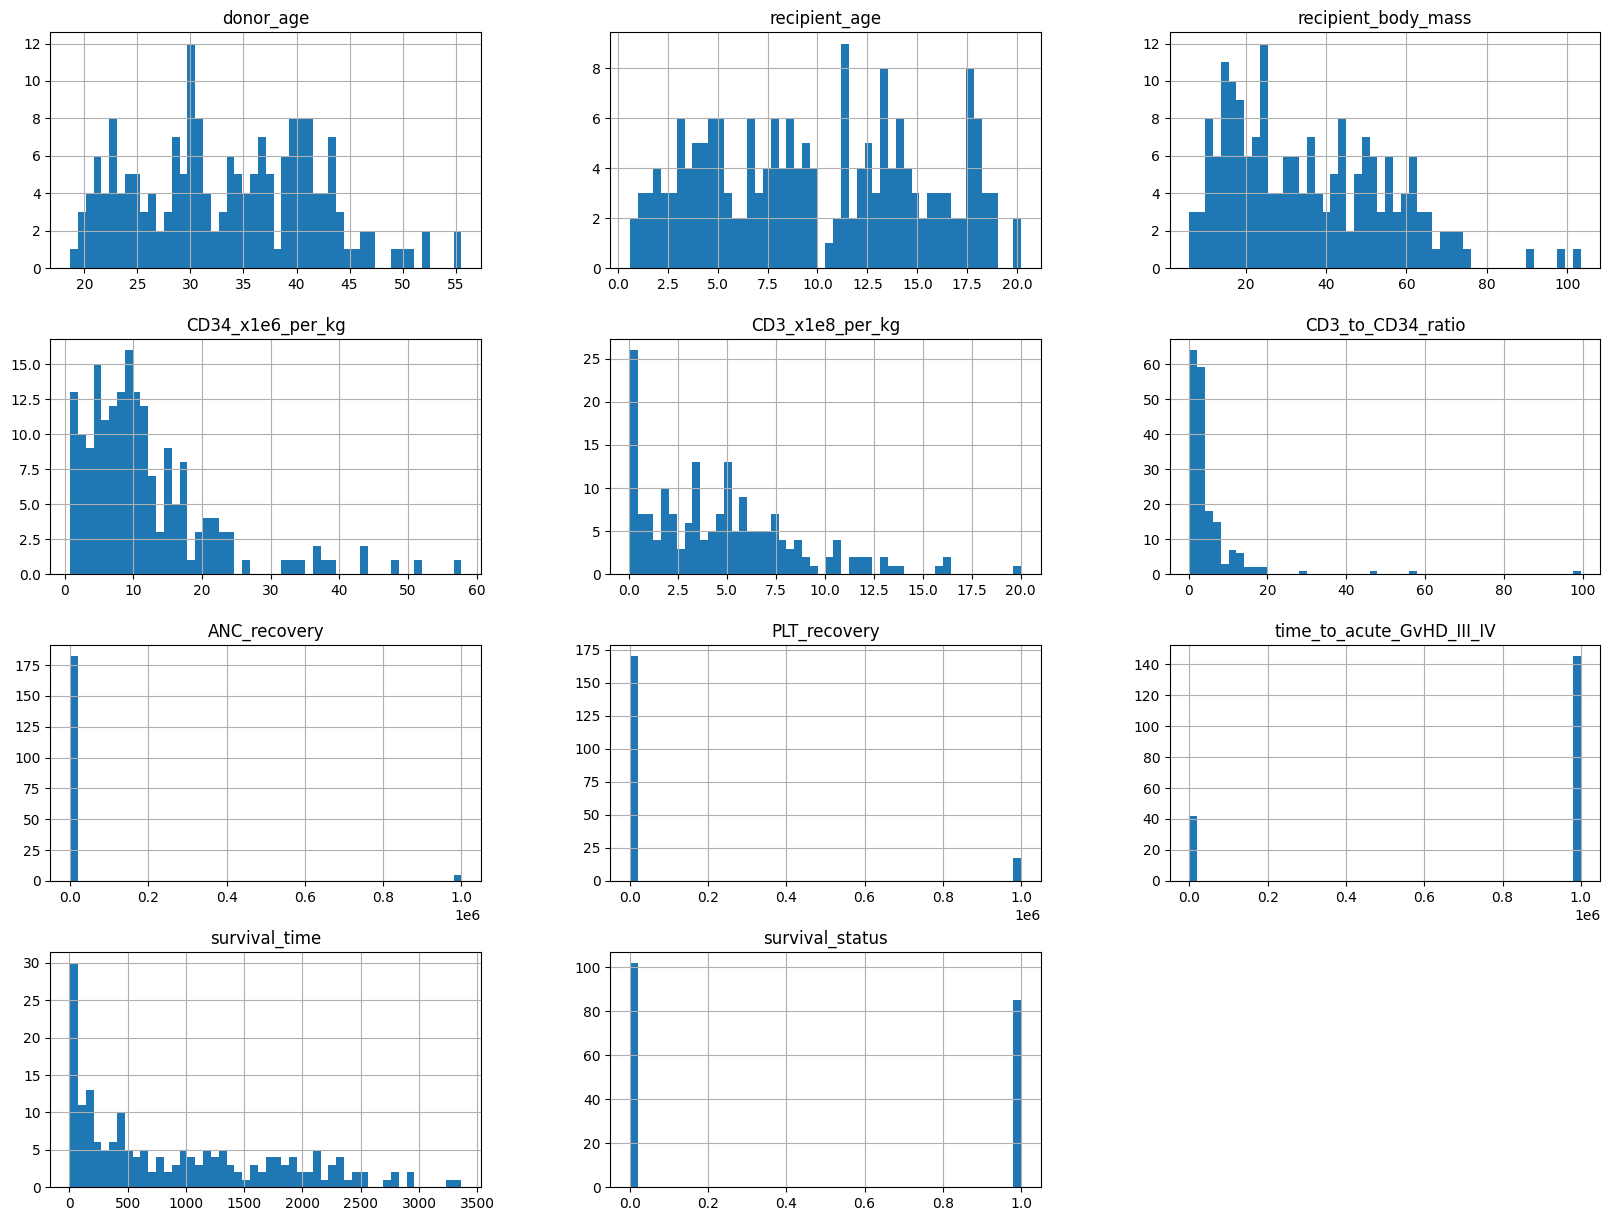

In [46]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# df["survival_time"].where(df["survival_status"] == 0).median()
df[["survival_time", "survival_status"]].sort_values(ascending=False, by="survival_time")

,survival_time,survival_status
159,3364.0,0
15,3288.0,0
144,2932.0,0
51,2926.0,0
5,2800.0,0
...,...,...
63,19.0,1
137,15.0,1
58,11.0,1
131,10.0,1


In [3]:
pd.crosstab([df["donor_CMV"], df["recipient_CMV"]], df["CMV_status"])

CMV_status                0   1   2   3  ?
donor_CMV recipient_CMV                   
?         ?               0   0   0   0  1
          present         0   0   0   0  1
absent    ?               0   0   0   0  9
          absent         46   0   0   0  0
          present         2   0  56   0  0
present   ?               0   0   0   0  4
          absent          0  27   0   0  0
          present         0   0   1  39  1

In [7]:
pd.crosstab([df["disease"], df["disease_group"]], df["risk_group"])

,risk_group,high,low
disease,disease_group,,
ALL,malignant,14,54
AML,malignant,19,14
chronic,malignant,24,21
lymphoma,malignant,7,2
nonmalignant,nonmalignant,5,27


<Axes: title={'center': 'recipient_body_mass'}, xlabel='relapse'>

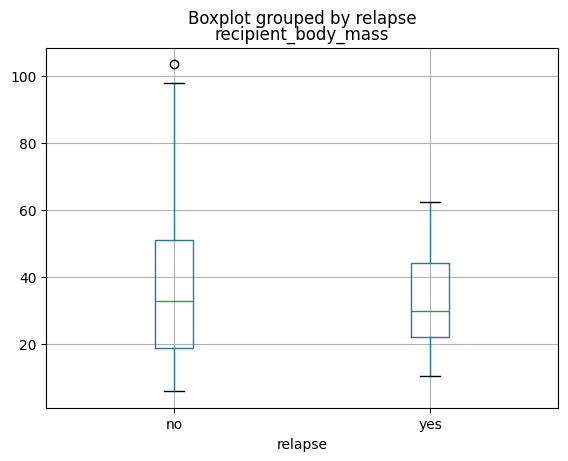

In [9]:
df.boxplot(column="recipient_body_mass", by="relapse")